<a href="https://colab.research.google.com/github/dougscohen/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  prob_not_drunk = 1 - prob_drunk_prior
  numerator = true_positive_rate*prob_drunk_prior
  denominator = (true_positive_rate*prob_drunk_prior) + (false_positive_rate*prob_not_drunk)
  posterior = numerator / denominator
  return posterior

In [8]:
# The probability that a person is drunk after one positive breathalyzer test
# is 1.24%

prob_drunk_given_positive(1/1000, .08, 1)

0.012357884330202669

In [10]:
# The probability that a person is drunk after two positive breathalyzer tests
# is 13.52%

prob_drunk_given_positive(0.012357884330202669, .08, 1)

0.13525210993291495

In [11]:
prob_drunk_given_positive(0.13525210993291495, .08, 1)

0.6615996951348605

In [13]:
# It would take 4 positive breathalyzer tests in order to have a probability 
# that's greater than 95% that a person is drunk beyond the legal limit.

prob_drunk_given_positive(0.6615996951348605, .08, 1)

0.9606895076105054

In [118]:
# Caluculate posterior result each time using for loop

prior = 1/1000
prob_drunk_posterior = []
for i in range (1,11):
  prior = prob_drunk_given_positive(prior, .08, 1)
  prob_drunk_posterior.append(prior)

prob_drunk_posterior

[0.012357884330202669,
 0.13525210993291495,
 0.6615996951348605,
 0.9606895076105054,
 0.9967371577896734,
 0.9997381867081508,
 0.9999790498904363,
 0.9999983239589307,
 0.9999998659165077,
 0.9999999892733192]

Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [15]:
# load in the dataset

column_headers = ['Class Name','handicapped-infants', 
                  'water-project-cost-sharing', 
                  'adoption-of-the-budget-resolution', 'physician-fee-freeze', 
                  'el-salvador-aid', 'religious-groups-in-schools', 
                  'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 
                  'mx-missile', 'immigration', 'synfuels-corporation-cutback', 
                  'education-spending' , 'superfund-right-to-sue', 'crime', 
                  'duty-free-exports', 'export-administration-act-south-africa']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names=column_headers)

df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [16]:
# Change values to numbers

df = df.replace({'y': 1, 'n': 0, '?': np.NaN})

df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [17]:
# Create a subset of the dataset that is just Republicans

rep = df[df['Class Name'] == 'republican']

rep.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [18]:
# Create a subset of the dataset that is just Democrats

dem = df[df['Class Name'] == 'democrat']

dem.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [60]:
# Get a subset of just the crime column so that I can drop NaN values

crime_subset = df[['Class Name', 'crime']]

crime_subset.head()

,Class Name,crime
0,republican,1.0
1,republican,1.0
2,democrat,1.0
3,democrat,0.0
4,democrat,1.0


In [61]:
# Drop NaN values so that we can generate the confidence interval (need a mean)
# Can't do that with NaN values present

crime_subset = crime_subset.dropna()

print(crime_subset.shape)
crime_subset.head()

(418, 2)


,Class Name,crime
0,republican,1.0
1,republican,1.0
2,democrat,1.0
3,democrat,0.0
4,democrat,1.0


In [19]:
# Subset the crime votes for just Republicans

rep_crime_subset = rep['crime']

print(rep_crime_subset.shape)
rep_crime_subset.head()

(168,)


0     1.0
1     1.0
7     1.0
8     1.0
10    1.0
Name: crime, dtype: float64

In [20]:
# Drop the NaN values so that I can calculate a confidence interval

rep_crime_subset = rep_crime_subset.dropna()

print(rep_crime_subset.shape)
rep_crime_subset.head()

(161,)


0     1.0
1     1.0
7     1.0
8     1.0
10    1.0
Name: crime, dtype: float64

In [21]:
# Subset the crime votes for just Democrats

dem_crime_subset = dem['crime']

print(dem_crime_subset.shape)
dem_crime_subset.head()

(267,)


2    1.0
3    0.0
4    1.0
5    1.0
6    1.0
Name: crime, dtype: float64

In [22]:
# Drop the NaN values so that I can calculate a confidence interval

dem_crime_subset = dem_crime_subset.dropna()

print(dem_crime_subset.shape)
dem_crime_subset.head()

(257,)


2    1.0
3    0.0
4    1.0
5    1.0
6    1.0
Name: crime, dtype: float64

In [0]:
# Create confidence interval function

def confidence_interval(sample, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  # NumPy Arrays are your friend
  sample = np.array(sample)
  # What is my estimate  - the mean
  mean = np.mean(sample)
  # Sample Size
  n = len(sample)
  # standard error
  # stderr = stats.sem(data)
  # I want the sample standard deviation
  stderr = np.std(sample, ddof=1) / np.sqrt(n)
  # Look up the t-statistic that contains 95% of possible sample means
  # within its bounds
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  # Margin Of Error
  margin_of_error = t * stderr
  return mean - margin_of_error, mean, mean + margin_of_error

In [25]:
# Get the confidence interval

confidence_interval(rep_crime_subset)

(0.960253517544598, 0.9813664596273292, 1.0024794017100602)

In [0]:
# Assign frequentist confidence interval of the republican crime subset to 
# a variable

freq_CI_rep_crime = confidence_interval(rep_crime_subset)

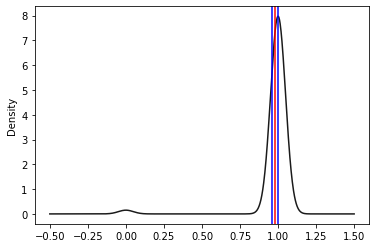

In [121]:
# plot the frequentist confidence interval with upper bound, mean, and 
# lower bound

rep_crime_subset.plot.density(color='k')
plt.axvline(freq_CI_rep_crime[0], color='blue')
plt.axvline(freq_CI_rep_crime[1], color='red')
plt.axvline(freq_CI_rep_crime[2], color='blue')
plt.show()

In [115]:
# Bayesian Confidence Interval

baye_CI_rep_crime, _, _ = stats.bayes_mvs(rep_crime_subset, alpha=.95)

baye_CI_rep_crime

Mean(statistic=0.9813664596273292, minmax=(0.960253517544598, 1.0024794017100602))

In [125]:
# Turn the baye CI interval output into a Numpy Array so that I can access 
# them with indexing

baye_CI_rep_crime = np.array(baye_CI_rep_crime)

baye_CI_rep_crime

array([0.9813664596273292, (0.960253517544598, 1.0024794017100602)],
      dtype=object)

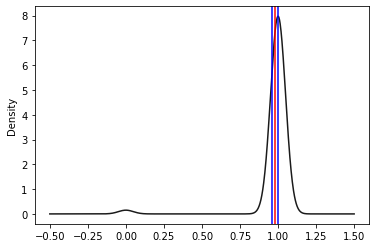

In [126]:
# plot the bayesian confidence interval with upper bound, mean, and 
# lower bound

rep_crime_subset.plot.density(color='k')
plt.axvline(baye_CI_rep_crime[1][0], color='blue')
plt.axvline(baye_CI_rep_crime[0], color='red')
plt.axvline(baye_CI_rep_crime[1][1], color='blue')
plt.show()

In [0]:
import seaborn as sns

In [63]:
# Frequentist confidence interval for the crime subset

CI_crime = confidence_interval(crime_subset['crime'])

CI_crime

(0.546017195315226, 0.5933014354066986, 0.6405856754981711)

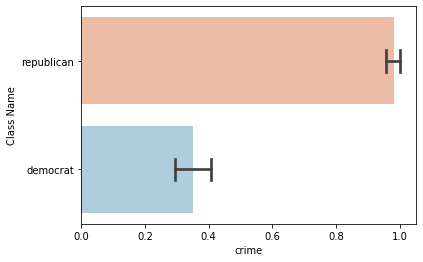

In [109]:
sns.barplot(x="crime", y="Class Name", data=crime_subset, orient='h',
                 order=["republican", "democrat"], capsize=.2, palette='RdBu')

plt.show()

In [0]:
# Frequentist statistics is the concept that you use sampling to establish 
# probabilities (estimating something based on a sample)

# Bayesian statistics uses a prior probability and the updates it when new 
# information comes along

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!